EDA

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [21]:
try:
    data_path = "../artifacts/data_ingestion/data.csv"
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully from {data_path}. Shape: {df.shape}")
except FileNotFoundError:
    print(f"---! ERROR !---")
    print(f"Could not find file at {data_path}")
    print("Did you run the pipeline (python main.py) at least once?")

display(df.head())



Data loaded successfully from ../artifacts/data_ingestion/data.csv. Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
miss_data = df.isnull().sum().sort_values(ascending=False)

In [24]:
miss_data

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

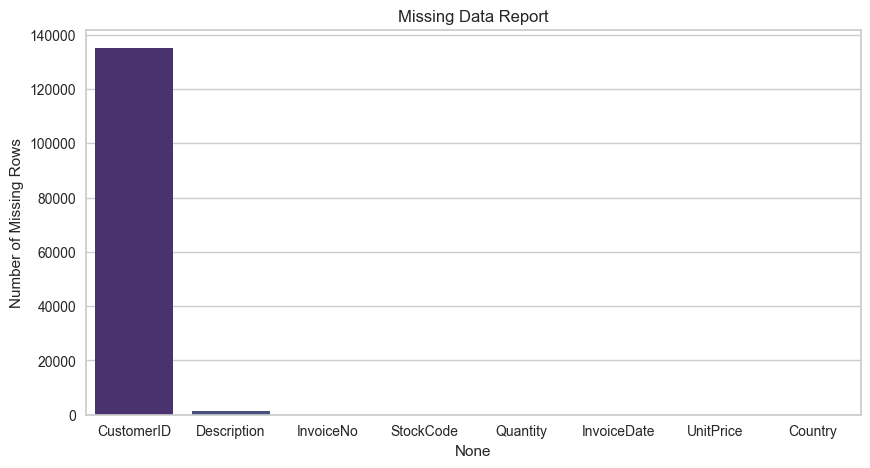

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=miss_data.index, y=miss_data.values, palette="viridis")
plt.title('Missing Data Report')
plt.ylabel('Number of Missing Rows')
plt.show()

In [26]:
display(df.describe)

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  C

In [27]:
display(df[df['Quantity'] < 0].head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [28]:
junk = df[df['StockCode'].str.isalpha() == True]['StockCode'].unique()

In [29]:
df_clean = df.dropna(subset=['CustomerID'])

In [30]:
df_clean.shape

(406829, 8)

In [31]:
df.shape

(541909, 8)

In [32]:
df_clean = df_clean[df_clean['Quantity'] > 0]

In [33]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
junk_codes = list(junk)
df_clean = df_clean[~df_clean['StockCode'].isin(junk_codes)]
df_clean.shape

(396515, 8)

In [35]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

In [36]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%Y %H:%M')


ValueError: time data "2010-12-01 08:26:00" doesn't match format "%m/%d/%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [37]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396515 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396515 non-null  object        
 1   StockCode    396515 non-null  object        
 2   Description  396515 non-null  object        
 3   Quantity     396515 non-null  int64         
 4   InvoiceDate  396515 non-null  datetime64[ns]
 5   UnitPrice    396515 non-null  float64       
 6   CustomerID   396515 non-null  int32         
 7   Country      396515 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.7+ MB


In [39]:
if 'total_price' not in df_clean.columns:
    df_clean['total_price'] = df_clean['Quantity'] * df_clean['UnitPrice']
    

In [40]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [41]:
snapshot_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Snapshot date (our 'today'): {snapshot_date}")

Snapshot date (our 'today'): 2011-12-10 12:50:00


In [42]:
recency_df = df_clean.groupby('CustomerID').agg(
    Last_Purchase_Date=('InvoiceDate', 'max')
).reset_index()

In [43]:
recency_df.head()

,CustomerID,Last_Purchase_Date
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [44]:
frequency_df = df_clean.groupby('CustomerID').agg(
    Frequency=('InvoiceNo', 'nunique')
).reset_index()

In [45]:
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [46]:
monetary_df = df_clean.groupby('CustomerID').agg(
    Monetary=('total_price', 'sum')
).reset_index()

In [47]:
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40


In [48]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID')

In [49]:
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')


In [50]:
rfm_df = rfm_df.set_index('CustomerID')

In [51]:
display(rfm_df.head())

,Last_Purchase_Date,Frequency,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12347,2011-12-07 15:52:00,7,4310.00
12348,2011-09-25 13:13:00,4,1437.24
12349,2011-11-21 09:51:00,1,1457.55
12350,2011-02-02 16:01:00,1,294.40


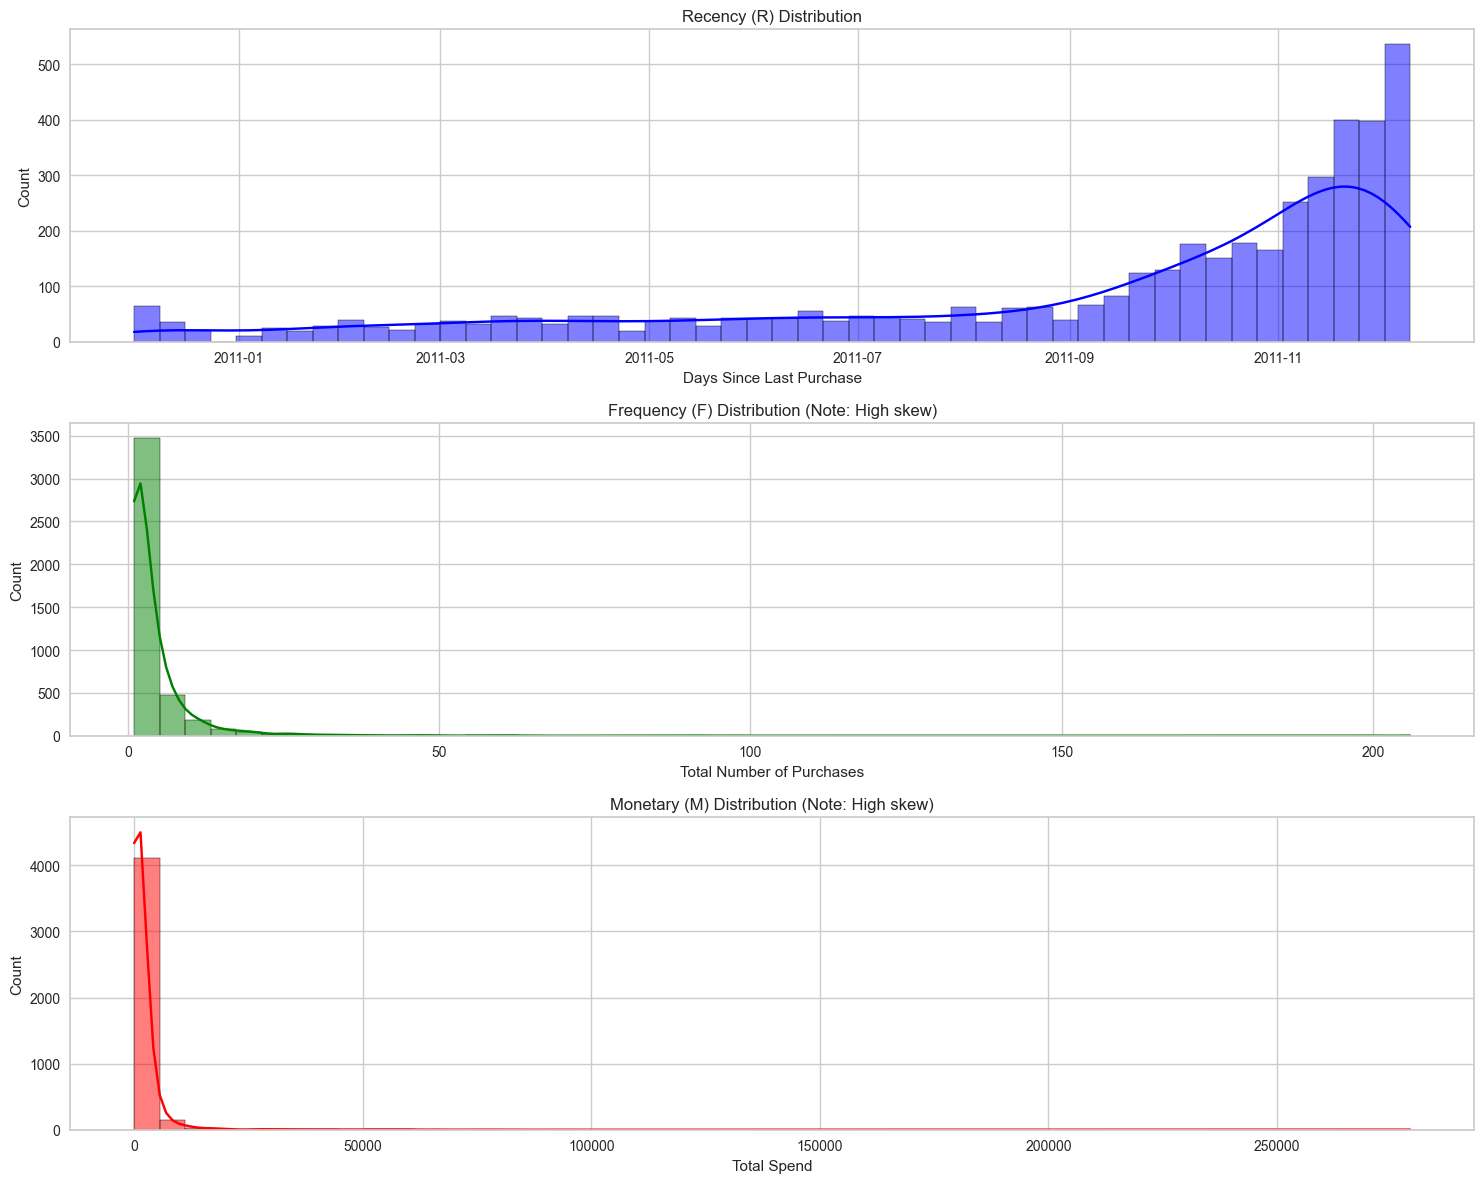

,Last_Purchase_Date,Frequency,Monetary
count,4336,4336.000000,4336.000000
mean,2011-09-08 07:56:00.221402112,4.247924,2022.121229
min,2010-12-01 09:53:00,1.000000,0.000000
25%,2011-07-20 11:03:00,1.000000,305.717500
50%,2011-10-20 09:48:30,2.000000,668.075000
75%,2011-11-22 11:13:15,5.000000,1631.327500
max,2011-12-09 12:50:00,206.000000,279138.020000
std,NaN,7.647368,8922.250228


In [52]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
sns.histplot(rfm_df['Last_Purchase_Date'], bins=50, kde=True, color='blue')
plt.title('Recency (R) Distribution')
plt.xlabel('Days Since Last Purchase')

plt.subplot(3, 1, 2)
sns.histplot(rfm_df['Frequency'], bins=50, kde=True, color='green')
plt.title('Frequency (F) Distribution (Note: High skew)')
plt.xlabel('Total Number of Purchases')


plt.subplot(3, 1, 3)
sns.histplot(rfm_df['Monetary'], bins=50, kde=True, color='red')
plt.title('Monetary (M) Distribution (Note: High skew)')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

display(rfm_df.describe())


In [69]:
import pycaret.clustering as pyc
import pandas as pd
import numpy as np
import datetime as dt

print("Libraries imported.")


print(f"Starting from 'df_clean' (Shape: {df_clean.shape})")

if 'total_price' not in df_clean.columns:
    df_clean['total_price'] = df_clean['Quantity'] * df_clean['UnitPrice']

snapshot_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)
recency_df = df_clean.groupby('CustomerID').agg(Last_Purchase_Date=('InvoiceDate', 'max')).reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['Last_Purchase_Date']).dt.days
frequency_df = df_clean.groupby('CustomerID').agg(Frequency=('InvoiceNo', 'nunique')).reset_index()
monetary_df = df_clean.groupby('CustomerID').agg(Monetary=('total_price', 'sum')).reset_index()

rfm_df = recency_df[['CustomerID', 'Recency']].merge(frequency_df[['CustomerID', 'Frequency']], on='CustomerID')
rfm_df = rfm_df.merge(monetary_df[['CustomerID', 'Monetary']], on='CustomerID')
rfm_df = rfm_df.set_index('CustomerID')
print("RFM table created successfully.")


print("\nApplying log(x+1) transformation...")
rfm_df_log = rfm_df.copy()
rfm_df_log['Recency'] = np.log(rfm_df_log['Recency'] + 1)
rfm_df_log['Frequency'] = np.log(rfm_df_log['Frequency'] + 1)
rfm_df_log['Monetary'] = np.log(rfm_df_log['Monetary'] + 1)
print("Log transform complete.")


print("\nSetting up PyCaret Experiment...")
rfm_data_for_pycaret = rfm_df_log.reset_index()


exp_cluster = pyc.ClusteringExperiment()


exp_cluster.setup(
    data = rfm_data_for_pycaret,
    normalize = True,
    normalize_method = 'zscore',
    ignore_features = ['CustomerID'],
    session_id = 42,
    verbose = True
)
print("\nPyCaret setup complete.")


print("\n--- Running ROBUST Model Comparison ---")

all_models_menu = exp_cluster.models()
all_model_ids = all_models_menu.index.tolist()


models_to_skip = ['hclust', 'dbscan', 'optics']

print(f"Total models available: {len(all_model_ids)}")
print(f"Will attempt to train: {[m for m in all_model_ids if m not in models_to_skip]}")


results = []


for model_id in all_model_ids:
    if model_id in models_to_skip:
        print(f"\n--- SKIPPING Model: {model_id} (Intentionally skipped: too slow) ---")
        continue

    print(f"\n--- Training Model: {model_id} ---")
    
    try:
        #
        model = exp_cluster.create_model(model_id, num_clusters=4)
        
        
        model_metrics = exp_cluster.pull()
        
        
        model_metrics.index = [model_id]
        results.append(model_metrics)
        
    except Exception as e:
        
        print(f"--- FAILED Model: {model_id}. Error: {e} ---")


leaderboard = pd.concat(results)

print("\n--- Final Model Comparison Leaderboard ---")
display(leaderboard.sort_values(by='Silhouette', ascending=False))

Libraries imported.
Starting from 'df_clean' (Shape: (396515, 9))
RFM table created successfully.

Applying log(x+1) transformation...
Log transform complete.

Setting up PyCaret Experiment...


,Description,Value
0,Session id,42
1,Original data shape,"(4336, 4)"
2,Transformed data shape,"(4336, 3)"
3,Ignore features,1
4,Numeric features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True



PyCaret setup complete.

--- Running ROBUST Model Comparison ---
Total models available: 8
Will attempt to train: ['kmeans', 'ap', 'meanshift', 'sc', 'birch']

--- Training Model: kmeans ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3369,3312.6375,1.0163,0,0,0



--- Training Model: ap ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2129,285.5078,0.5772,0,0,0



--- Training Model: meanshift ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3698,629.9978,0.6463,0,0,0



--- Training Model: sc ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5738,86.8729,1.0820,0,0,0



--- SKIPPING Model: hclust (Intentionally skipped: too slow) ---

--- SKIPPING Model: dbscan (Intentionally skipped: too slow) ---

--- SKIPPING Model: optics (Intentionally skipped: too slow) ---

--- Training Model: birch ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1844,1589.1606,1.1603,0,0,0



--- Final Model Comparison Leaderboard ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
sc,0.5738,86.8729,1.0820,0,0,0
meanshift,0.3698,629.9978,0.6463,0,0,0
kmeans,0.3369,3312.6375,1.0163,0,0,0
ap,0.2129,285.5078,0.5772,0,0,0
birch,0.1844,1589.1606,1.1603,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5738,86.8729,1.0820,0,0,0


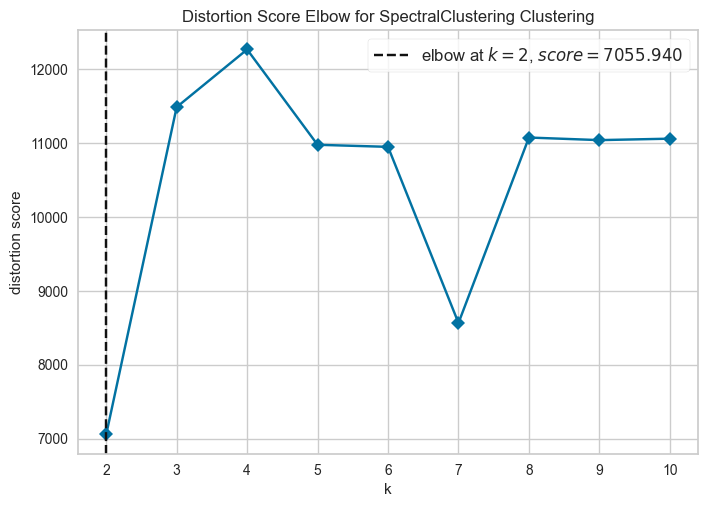

--- Plotting Silhouette Scores for different 'k' ---
Pivoting to K-Means for tuning (Elbow Method is designed for it).


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3369,3312.6375,1.0163,0,0,0


Plotting Elbow for K-Means...


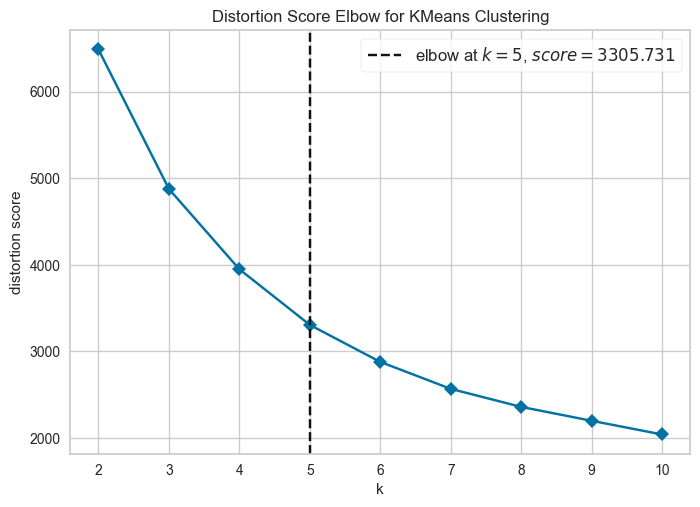

Plotting Silhouette for K-Means (k=4)...


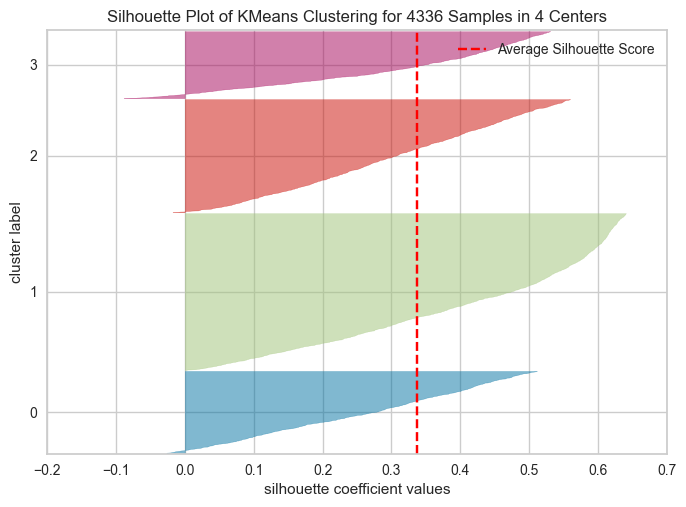

In [71]:
sc_model = exp_cluster.create_model('sc', num_clusters=4)
exp_cluster.plot_model(sc_model, plot = 'elbow')
print("--- Plotting Silhouette Scores for different 'k' ---")
print("Pivoting to K-Means for tuning (Elbow Method is designed for it).")
kmeans_model = exp_cluster.create_model('kmeans', num_clusters=4)
print("Plotting Elbow for K-Means...")
exp_cluster.plot_model(kmeans_model, plot = 'elbow')
print("Plotting Silhouette for K-Means (k=4)...")
exp_cluster.plot_model(kmeans_model, plot = 'silhouette')

--- Creating our FINAL model: K-Means with k=5 ---


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3160,3177.8574,0.9868,0,0,0



--- Plotting Silhouette for K-Means (k=5) ---


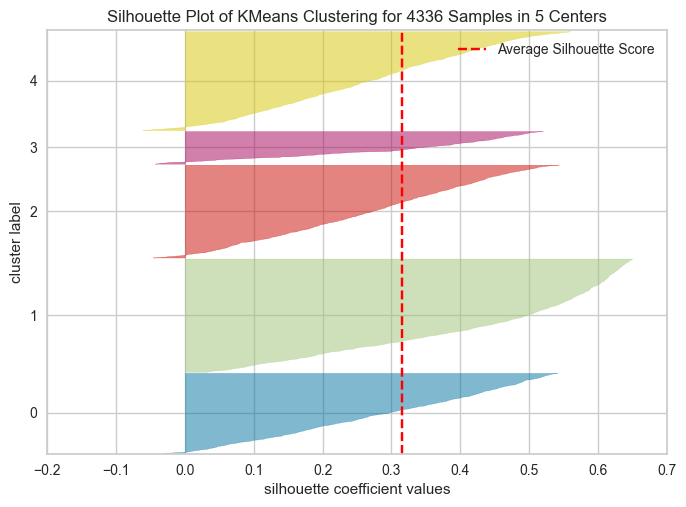

In [72]:
print("--- Creating our FINAL model: K-Means with k=5 ---")
final_kmeans_model = exp_cluster.create_model('kmeans', num_clusters=5)
print("\n--- Plotting Silhouette for K-Means (k=5) ---")
exp_cluster.plot_model(final_kmeans_model, plot = 'silhouette')


Selected Model : SC
num_clusters = 4
score =0.574